In [35]:
# from zawadx_implementation.TropicalGraph import TropicalGraph
import networkx as nx
import numpy as np
# from typing import Self

In [41]:
g = 2
n = 0

num_vertices = 2 * g - 2 + n 
num_edges = 3 * g - 3 + n

1


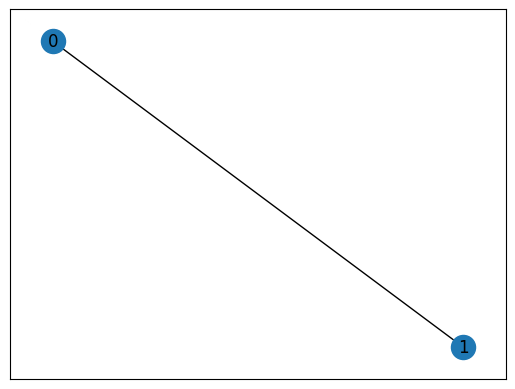

In [43]:
valid_trees = []
for T in nx.generators.nonisomorphic_trees(num_vertices):
    if any([T.degree(v) > 3 for v in T.nodes]):
        continue
    valid_trees += [nx.MultiGraph(T)]

print(len(valid_trees))
nx.draw_networkx(valid_trees[0])

True


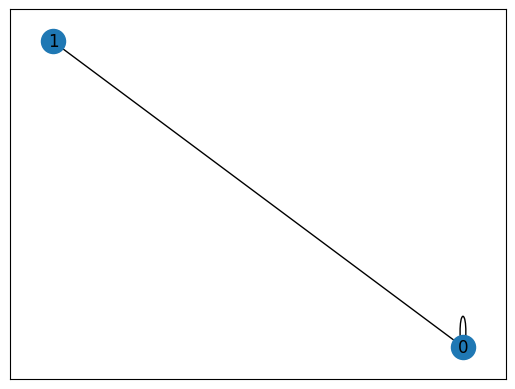

In [63]:
def all_ways_add_edge(G):
    output = []
    checked = []
    for v in G.nodes:
        if G.degree(v) < 2 : 
            for w in G.nodes:
                if w not in checked:
                    tempG = G.copy()
                    tempG.add_edge(v, w)
                    if not any([nx.vf2pp_is_isomorphic(tempG, otherG) for otherG in output]):
                        output += [tempG]
        elif G.degree(v) < 3:
            for w in G.nodes:
                if (w not in checked) and (w != v) : 
                    tempG = G.copy()
                    tempG.add_edge(v, w)
                    if not any([nx.vf2pp_is_isomorphic(tempG, otherG) for otherG in output]):
                        output += [tempG]
        checked += [v]
    
    return output

out = all_ways_add_edge(valid_trees[0])
nx.draw_networkx(out[2])
print(nx.vf2pp_is_isomorphic(out[0], out[2]))